Введение в Пандас. Анализ данных Нью-Йоркского байк-шеринга за январь 2018 год

* [all data](https://s3.amazonaws.com/tripdata/index.html)
* [info](https://www.citibikenyc.com/system-data)

In [3]:
%matplotlib inline
import pylab as plt
plt.style.use('fivethirtyeight')

import pandas as pd

# Reading the dataset

In [127]:
path = '../data/l5/201801-citibike-tripdata.csv.zip'

In [128]:
df = pd.read_csv(path)

In [129]:
df.shape  # 15 колонок, ~719 тысяч поездок

(718994, 15)

вы можете представить себе DataFrame как 2D-таблицу, которая имеет индекс строк и названия колонок (индекс колонок). Основное условие - данные в каждой колонке одинакого типа

In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.head(3)
# or df.tail(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1


In [11]:
df.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                   int64
gender                       int64
dtype: object

# Pandas Interface

## Selecting Columns (Series)

In [12]:
df.tripduration.head(10)

0     970
1     723
2     496
3     306
4     306
5    1602
6     722
7     434
8     366
9     324
Name: tripduration, dtype: int64

In [13]:
df['end station id'].head(10)

0     505
1    3255
2     525
3     447
4    3356
5     482
6     228
7     173
8     479
9     450
Name: end station id, dtype: int64

In [15]:
df[['start station id', 'end station id']].head(10)

,start station id,end station id
0,72,505
1,72,3255
2,72,525
3,72,447
4,72,3356
5,72,482
6,72,228
7,72,173
8,72,479
9,72,450


Series - одна колонка. кроме данных, она имеет индекс и название.

In [20]:
type(df['end station id'])

pandas.core.series.Series

In [18]:
df['end station id'].name

'end station id'

Series можно воспринимать как iterable

In [21]:
len(df['end station id'])

718994

## Subsets

In [23]:
df.tail(4)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
718990,244,2018-01-31 17:34:20.4510,2018-01-31 17:38:24.7200,3664,North Moore St & Greenwich St,40.720195,-74.010301,327,Vesey Pl & River Terrace,40.715338,-74.016584,26896,Subscriber,1960,1
718991,302,2018-01-31 18:20:55.5430,2018-01-31 18:25:58.3350,3664,North Moore St & Greenwich St,40.720195,-74.010301,327,Vesey Pl & River Terrace,40.715338,-74.016584,33111,Subscriber,1965,1
718992,222,2018-01-31 18:47:42.5720,2018-01-31 18:51:24.6830,3664,North Moore St & Greenwich St,40.720195,-74.010301,257,Lispenard St & Broadway,40.719392,-74.002472,16675,Subscriber,1969,0
718993,713,2018-01-31 19:35:55.4840,2018-01-31 19:47:48.6400,3664,North Moore St & Greenwich St,40.720195,-74.010301,280,E 10 St & 5 Ave,40.733320,-73.995101,17928,Subscriber,1991,1


In [24]:
df.loc[718990:,'start station name']

718990    North Moore St & Greenwich St
718991    North Moore St & Greenwich St
718992    North Moore St & Greenwich St
718993    North Moore St & Greenwich St
Name: start station name, dtype: object

In [25]:
df.loc[718990:,['start station name']]

,start station name
718990,North Moore St & Greenwich St
718991,North Moore St & Greenwich St
718992,North Moore St & Greenwich St
718993,North Moore St & Greenwich St


In [26]:
df.iloc[:3, :3]

,tripduration,starttime,stoptime
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720


## Masking

In [27]:
less_than_an_hour = df['tripduration'] < (1*60*60) # один час

In [28]:
less_than_an_hour.head(5)

0    True
1    True
2    True
3    True
4    True
Name: tripduration, dtype: bool

In [30]:
df.shape[0]

718994

In [31]:
df[less_than_an_hour].shape[0]

716570

## Vectorised operations

### Numbers

In [136]:
df['tripduration_M'] = df['tripduration'] / 60  # in minutes

In [138]:
# (df['tripduration_M'] * df['gender']).head(2)  # для примера, никакого смысла

### Datetime

In [45]:
df['starttime'].dtype

dtype('<M8[ns]')

In [42]:
timecols = ['starttime', 'stoptime']

In [46]:
for col in timecols:
    df[col] = pd.to_datetime(df[col])   # на самом деле это можно и лучше делать сразу при загрузке, причем если указать формат, будет быстрее

In [47]:
df['starttime'].dtype

dtype('<M8[ns]')

In [51]:
df['dow'] = df['starttime'].dt.dayofweek

In [56]:
df['daytime_M'] = df['starttime'].dt.hour * 60 + df['starttime'].dt.minute
# or df['starttime'].dt.time

### Strings

In [57]:
df['start station name'].head(3)

0    W 52 St & 11 Ave
1    W 52 St & 11 Ave
2    W 52 St & 11 Ave
Name: start station name, dtype: object

In [59]:
df['start station name'].str.contains('W 52').head(3)

0    True
1    True
2    True
Name: start station name, dtype: bool

In [61]:
df['start station name'].str.upper().head(3)

0    W 52 ST & 11 AVE
1    W 52 ST & 11 AVE
2    W 52 ST & 11 AVE
Name: start station name, dtype: object

### Logic

In [62]:
mask  = df['start station name'].str.contains('W 52') & df['end station name'].str.contains('W 52')

In [63]:
mask.head(3)

0    False
1    False
2    False
dtype: bool

In [64]:
mask.sum()

486

Разница:
- "~" stands for "not" instead of scalar "!"

### Задание

создайте маску и выберете поездки где пользователь - подписчик, а пол - 0 (неизвестен)

сколько таких записей в базе?

---------

# Feature Exploration

давайте посмотрим на сами данные

In [20]:
df.describe() # каждая колонка может так

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,7.189940e+05,718994.000000,718994.000000,718994.000000,718994.000000,718994.000000,718994.000000,718994.000000,718994.000000,718994.000000
mean,8.268107e+02,1469.519095,40.737894,-73.982934,1460.948474,40.737620,-73.983203,26078.046315,1977.765945,1.169969
std,3.279694e+04,1398.626487,0.044702,0.018219,1396.759046,0.044525,0.018273,6311.931441,12.016931,0.472668
min,6.100000e+01,72.000000,40.646538,-74.017134,72.000000,40.646538,-74.033552,14529.000000,1885.000000,0.000000
25%,3.190000e+02,377.000000,40.719079,-73.994685,376.000000,40.719105,-73.994758,19558.000000,1969.000000,1.000000
50%,5.100000e+02,497.000000,40.739355,-73.985649,497.000000,40.739323,-73.986580,28538.000000,1980.000000,1.000000
75%,8.420000e+02,3170.000000,40.756687,-73.974987,3169.000000,40.756405,-73.975232,31571.000000,1988.000000,1.000000
max,1.951005e+07,3664.000000,45.506364,-73.568906,3664.000000,45.506364,-73.568906,33522.000000,2002.000000,2.000000


## Stations

In [75]:
sst, est = 'start station id', 'end station id'

In [76]:
df[sst].value_counts().head(10) # top start

519     8080
435     5093
3255    4852
402     4526
497     4503
490     4281
523     4278
477     4256
285     4223
459     4057
Name: start station id, dtype: int64

In [77]:
df[est].value_counts(normalize=True).head(10) # top end, percentage

519     0.011163
435     0.007138
3255    0.006893
497     0.006848
402     0.006654
459     0.006177
490     0.006075
523     0.006010
285     0.005975
477     0.005935
Name: end station id, dtype: float64

# Groupby - Top destinations

Давайте посчитаем топ-маршруты (OD-пары). как это сделать?

In [79]:
df[cols].value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [82]:
cols = [sst, est]

In [83]:
#   groupby колонки (любая колонка) (количество)    (топ 10 направлений)
df.groupby(cols)['start station id'].count().sort_values(ascending=False).head(10)

start station id  end station id
432               3263              533
519               498               326
435               509               305
3158              499               300
460               3093              280
519               492               278
258               324               270
481               3093              270
239               270               256
3263              317               253
Name: start station id, dtype: int64

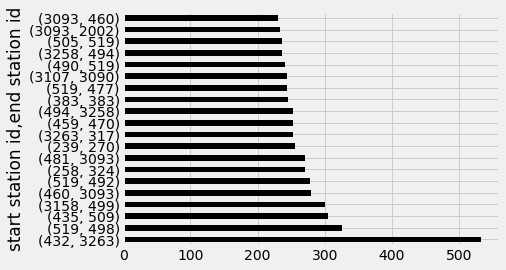

In [81]:
df.groupby(cols)['start station id'].count().sort_values(ascending=False).head(20).plot(kind='barh', color='k')

## А если нужно не только количество посчитать?

мысленно подумайте как бы вы это сделали в чистом питоне

In [89]:
metrics = df.groupby(cols).agg({'tripduration_M': ['mean', 'std', 'max'], 'start station id': 'count'})

аналогично agg существует transform - те же величины будет приклеены к изначальной таблице, вместо группировке - те количество строк будет оригинальным, но каждое путеществие будет иметь информацию о всех путешествиях по этому маршруту

In [90]:
metrics.head(10)

tripduration_M                        \
                                          mean        std        max   
start station id end station id                                        
72               72                  15.908333  11.648501  42.783333   
                 127                 20.088095   1.655175  22.200000   
                 146                 25.450000        NaN  25.450000   
                 161                 27.800000        NaN  27.800000   
                 164                 14.141667   0.740777  14.800000   
                 167                 17.800000        NaN  17.800000   
                 173                  7.108333   1.155079  12.483333   
                 212                 15.058333   3.110489  20.266667   
                 223                 19.641667   0.223917  19.800000   
                 228                 15.626667   4.317963  21.283333   

                                start station id  
                                           count  
start station id end station id                   
72               72                           22  
                 127                           7  
                 146                           1  
                 161                           1  
                 164                           6  
                 167                           1  
                 173                          48  
                 212                          10  
                 223                           2  
                 228                           5

agg и трансформ принимают и самописные функции - это как раз случай где удобно использовать лямбды

## Stack / Unstack 

а еще есть melt, pivot, etc -- никогда не пользовался...

In [92]:
C = df.groupby(['usertype', 'gender'])['gender'].count()

In [93]:
C.head(3)

usertype  gender
Customer  0         17141
          1          2906
          2          2061
Name: gender, dtype: int64

In [94]:
C.unstack()

gender,0,1,2
usertype,,,
Customer,17141,2906,2061
Subscriber,12458,534683,149745


# Age

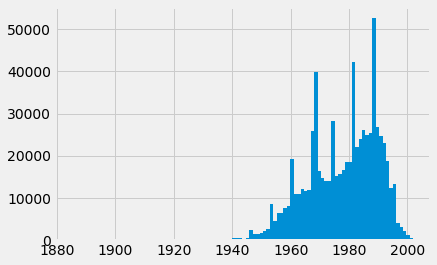

In [27]:
df['birth year'].hist(bins=100)

In [28]:
df['birth year'].max()

2002

In [29]:
df['birth year'].min()

1885

In [30]:
(2018 - df['birth year']).value_counts().head(5)

49    39851
29    26774
28    26741
33    26133
30    25817
Name: birth year, dtype: int64

## TripDuration

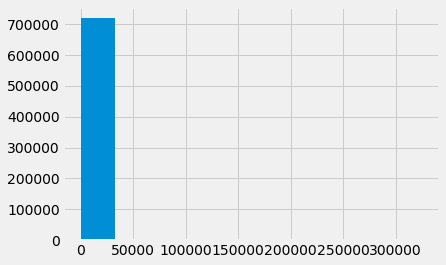

In [139]:
df['tripduration_M'].hist()

In [141]:
df['tripduration_M'].max() / (24*60)

225.81075231481481

In [143]:
hours = 1 
mask  = df['tripduration_M'] < hours * 60

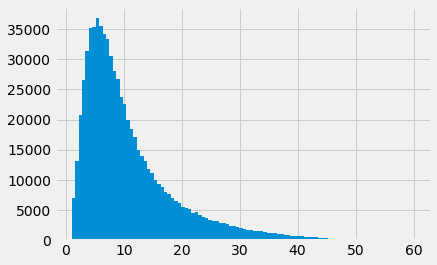

In [144]:
df[mask]['tripduration_M'].hist(bins=100)

# Минутка статистики

## Среднее и медиана

Среднее - сумма всех значений, деленное на количество значений. те "средний показатель"

$$ {\displaystyle A={\frac {1}{n}}\sum _{i=1}^{n}a_{i}={\frac {a_{1}+a_{2}+\cdots +a_{n}}{n}}} $$


In [37]:
def mean(list_of_numbers):
    return sum(list_of_numbers) / len(list_of_numbers) 

Медиана - среднее значение для двух средних (или одного, если нечетное количество) значений - другими словами, значение среднего

$${\displaystyle \mathrm {median} (a)={\frac {a_{\lceil \#x\div 2\rceil }+a_{\lceil \#x\div 2+1\rceil }}{2}}} $$

In [38]:
L = [1, 2]
len(L)/2

1.0

In [39]:
from math import floor

In [40]:
def median(list_of_numbers):
    L = len(list_of_numbers)
    sorted_l = sorted(list_of_numbers)  # *
    
    if L % 2 == 1:
        return sorted_l[floor(L/2)]
    
    else:
        second_el = int(L/2)
        return (sorted_l[second_el - 1] + sorted_l[second_el])/2

In [41]:
median([1,2,3])

2

In [42]:
median([1,4,3,2])

2.5

In [145]:
mean_td = df['tripduration_M'].mean()
f"Среднее время поездки - {mean_td:.2f} минуты"

'Среднее время поездки - 13.78 минуты'

In [146]:
median_td = df['tripduration_M'].median()
f"Медианное время поездки - {median_td:.2f} минуты"

'Медианное время поездки - 8.50 минуты'

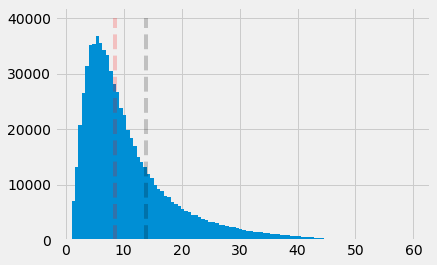

In [45]:
ax = df[mask]['tripduration_M'].hist(bins=100)
ax.vlines(mean_td, 0, 40000, linestyles='--', color='black', alpha=.2)
ax.vlines(median_td, 0, 40000, linestyles='--', color='red', alpha=.2)


In [46]:
ttdf = df.loc[mask]

In [47]:
mean_ctd = ttdf['tripduration_M'].mean()
median_ctd = ttdf['tripduration_M'].median()
print(f"после очистки среднее:{mean_ctd:.2f}, медиана:{median_ctd:.2f}")

после очистки среднее:10.97, медиана:8.47


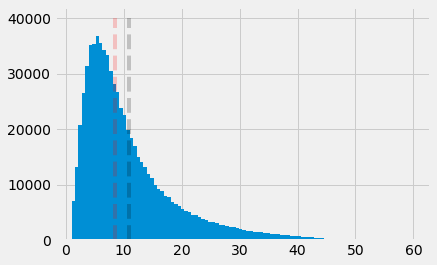

In [48]:
ax = df[mask]['tripduration_M'].hist(bins=100)
ax.vlines(mean_ctd, 0, 40000, linestyles='--', color='black', alpha=.2)
ax.vlines(median_ctd, 0, 40000, linestyles='--', color='red', alpha=.2)

## Среднее абсолютное отклонение (Mean Absolute Deviation)

In [49]:
def mad(list_of_numbers):
    M = mean(list_of_numbers)
    return sum([abs(el - M) for el in list_of_numbers]) / len(list_of_numbers)

In [50]:
mad([1,2,3,4,5])

1.2

In [51]:
6/5

1.2

## Как еще можно оценить это распределение? - Дисперсия

то же самое, но через квадраты

- уменьшает робастность (увеличивает влияние выхлопов)
- не те же единицы
- непрерывная функция, интегрируется

$${\displaystyle D[X]=\sum _{i=1}^{n}{p_{i}(x_{i}-M[X])^{2}}}$$

### Посчитать дисперсию самому в чистом питоне

In [52]:
def mean(list_of_numbers):
    return sum(list_of_numbers) / len(list_of_numbers) 

def variance(list_of_numbers, ddof=1):
    M = mean(list_of_numbers)
    return sum([(x-M)**2 for x in list_of_numbers]) / (len(list_of_numbers) - 1)

In [53]:
variance(ttdf['tripduration'])

68.18999555028573

In [54]:
%timeit variance(ttdf['tripduration'])

192 ms ± 15.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### посчитать дисперсию самому в Пандас

In [55]:
def hb_var(series, ddof=1):
    return ((series - series.mean())**2).sum() / (len(series) - 1)

In [56]:
hb_var(ttdf['tripduration'])

68.189995550278198

In [57]:
%timeit hb_var(ttdf['tripduration'])

10.7 ms ± 226 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Pandas variance

In [58]:
ttdf['tripduration'].var()

68.18999555028573

In [59]:
%timeit ttdf['tripduration'].var()

2.09 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Стандартная ошибка

Но дисперсия в квадратах величины (квадратные секунды). Что делать?

$${\displaystyle s={\sqrt {\frac {\sum _{i=1}^{N}(x_{i}-{\overline {x}})^{2}}{N-1}}}.}$$

In [60]:
STD = ttdf['tripduration'].std()
STD

8.257723387852474

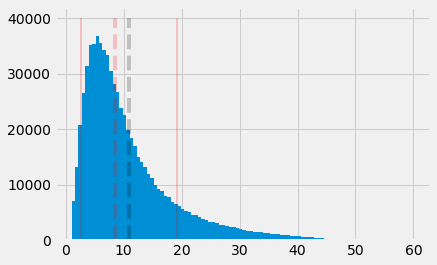

In [61]:
ax = df[mask]['tripduration'].hist(bins=100)
ax.vlines(mean_ctd, 0, 40000, linestyles='--', color='black', alpha=.2)
ax.vlines(median_ctd, 0, 40000, linestyles='--', color='red', alpha=.2)
ax.vlines([mean_ctd + STD, mean_ctd - STD], 0, 40000,  color='red', alpha=.2, linewidth=2)

# Различие в поведении - пол, подписка

In [147]:
df['age'] = 2018 - df['birth year']

In [148]:
df['gender'] = df['gender'].replace({0:'Unknown', 1:'Man', 2:"Woman"}).astype('category')

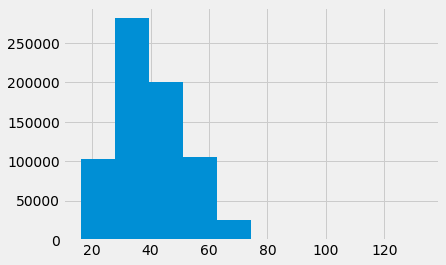

In [149]:
df['age'].hist()

In [150]:
df['birth year'].min()

1885

In [151]:
age_mask = df['age'] < 80
gender_mask = df['gender'] != 'Unknown'

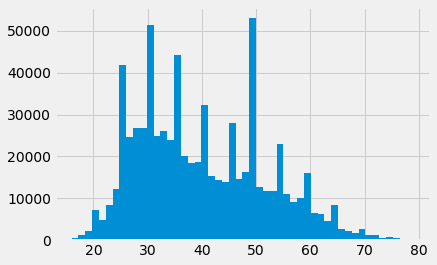

In [152]:
df.loc[age_mask, 'age'].hist(bins=50)

## Почему это так?

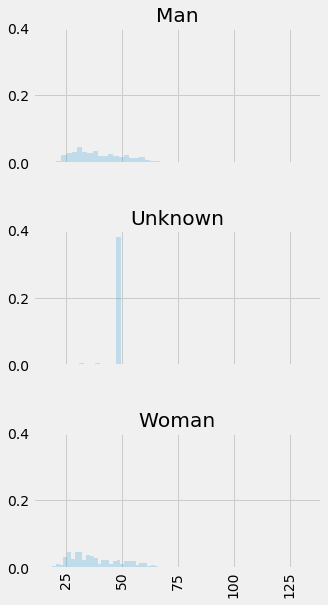

In [153]:
df.hist(column='age', by='gender', bins=50, alpha=.2, sharex=True, sharey=True, layout=(3,1), figsize=(5,10), density=1);
# df[gender_mask].hist(column='age', by='gender', bins=50, alpha=.2, sharex=True, sharey=True, layout=(3,1), figsize=(5,10), density=1);

In [161]:
# df.hist(column='age', by='usertype', bins=50, alpha=.2, sharex=True, sharey=True, layout=(3,1), figsize=(5,10), density=1);

## Scatterplot

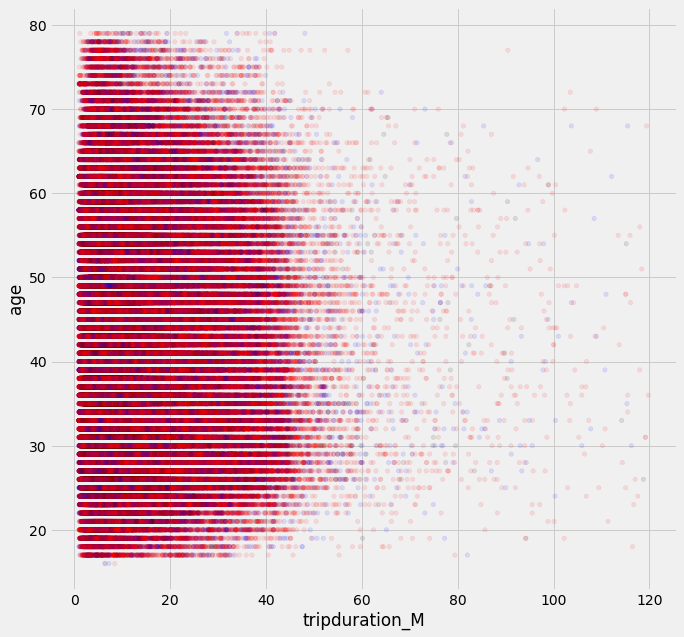

In [159]:
trip_mask = df['tripduration_M'] < 60*2  # 2 часа
colors = {'Man': 'red', 'Woman': 'blue', 'Unknown':'k'}

df[gender_mask & age_mask & trip_mask].plot.scatter(x='tripduration_M', y='age', c=df['gender'].replace(colors).values, figsize=(10,10), alpha=.1);

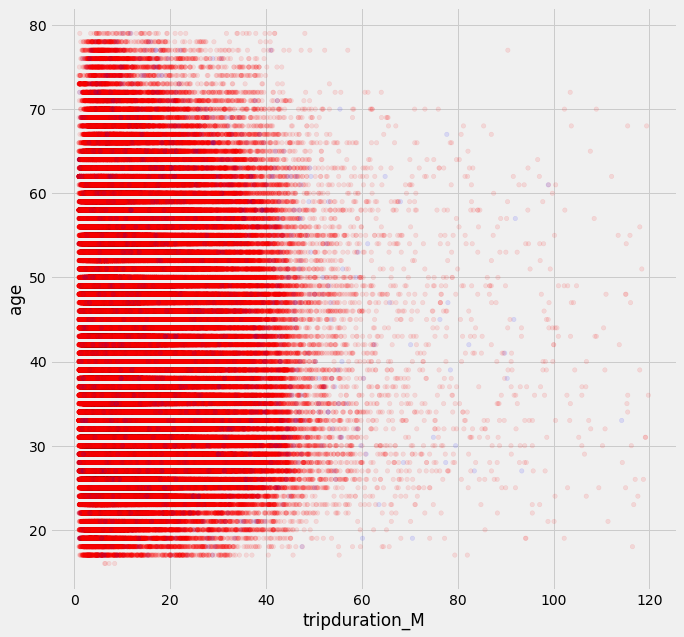

In [162]:
colors = {'Subscriber': 'red', 'Customer': 'blue', 'Unknown':'k'}
df[gender_mask & age_mask & trip_mask].plot.scatter(x='tripduration_M', y='age', c=df['usertype'].replace(colors).values, figsize=(10,10), alpha=.1);

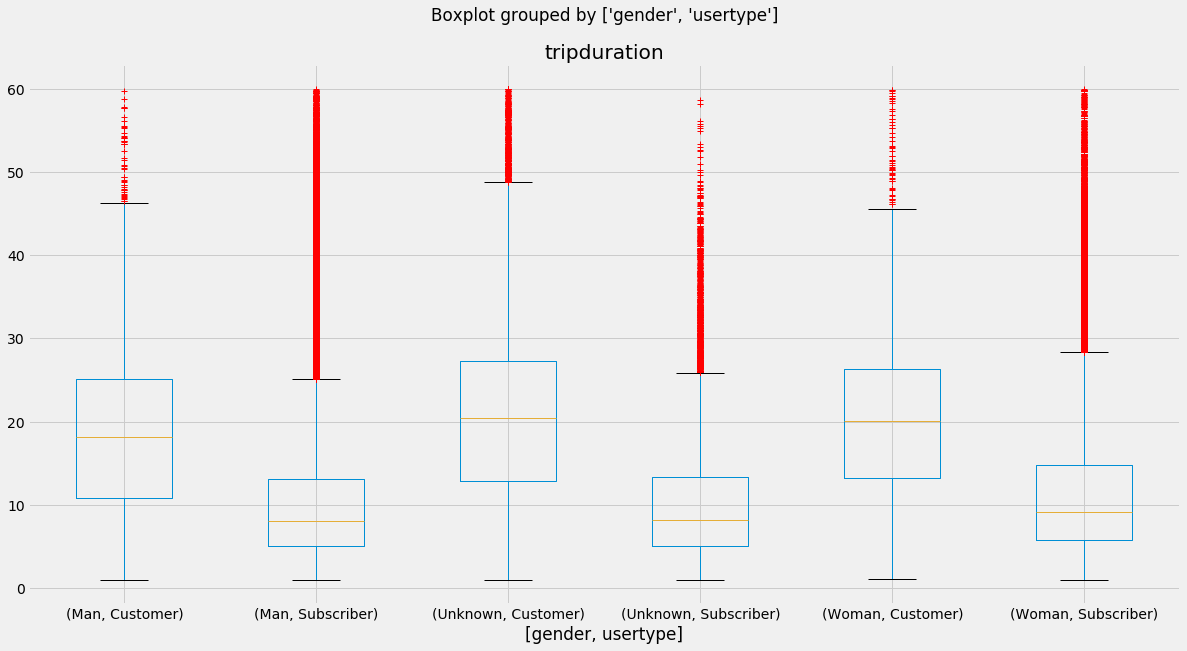

In [216]:
sdf[['tripduration', 'gender', 'usertype']].boxplot( by=['gender', 'usertype'], sym='r+', figsize=(20, 10))

# Для самостоятельного изучения

Что это за станции? геокодинг в Boroughs (5 мега-районов города - Манхеттен, Бронкс, Квинс, Бруклин и Стейтен Айленд)
[Живой фид по станциям](https://feeds.citibikenyc.com/stations/stations.json)

[Визуализация в пандасе](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [ ]:
#